## Convolutional Neural Network for MNIST

Code done as practice. This is a project done for the Coursera course "Introduction to Machine Learning". Most of the code was built from the guide of a Jupyter Notebook: https://www.coursera.org/learn/machine-learning-duke/ungradedLab/L9Xof/convolutional-neural-networks/lab?path=%2Fnotebooks%2F3A_Convolutional_Neural_Networks.ipynb.

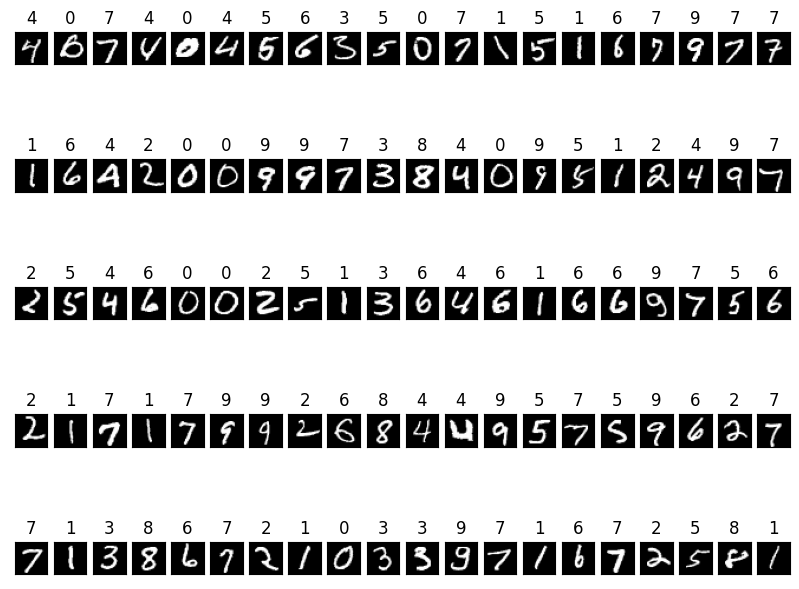

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

## DEFINE THE CNN WITH 2 CONVOLUTIONAL LAYERS, RELU AND MAXPOOLING
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Convolution layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2) 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2) 
        
        # Mult layers
        self.fc1 = nn.Linear(7*7*64,256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        
        # First convolution layer
        x = self.conv1(x) # Input size: [100, 1, 28, 28]  Output size: [100, 32, 28, 28]
        x = F.relu(x) # Activation Function
        x = F.max_pool2d(x, kernel_size=2) # Input size: [100, 32, 28, 28] Output size: [100, 32, 14, 14]
        
        # conv layer 2
        x = self.conv2(x) # Input size: [100, 32, 14, 14]  Output size: [100, 64, 14, 14]
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2) # Input size: [100, 64, 14, 14]  Output size: [100, 64, 7, 7]
        
        # fc layer 1
        x = x.view(-1, 7*7*64) # We need to reshape the tensor
        x = self.fc1(x)
        x = F.relu(x)
        
        #fc layer 2
        x = self.fc2(x)
        return x
        
        
## LOADING THE DATA 
train_set = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader =torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False)

## VISUALIZATION OF ONE BATCH MNIST DATASET
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
fig = plt.figure(figsize=(10,8))

for idx in np.arange(100): # 20 is the size of the batch
    ax = fig.add_subplot(5, 20, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))


In [50]:
## TRAINING THE MODEL

# Instantiate model
model = CNN()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

num_epochs = 10
model.train()
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in tqdm(enumerate(train_loader)):
        
        # Zero out the gradients
        optimizer.zero_grad()
        
        # Batch data
        im = images
        la = labels
        output = model(im)
        loss = criterion(output, la)
        loss.backward()
        optimizer.step()
        
        if(i+1)%100 == 0:
            print('Epoch({}/{}, Step({}/{}), Loss:{:.4f})'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

0it [00:00, ?it/s]

Epoch(1/10, Step(100/600), Loss:0.0804)
Epoch(1/10, Step(200/600), Loss:0.0935)
Epoch(1/10, Step(300/600), Loss:0.0790)
Epoch(1/10, Step(400/600), Loss:0.0259)
Epoch(1/10, Step(500/600), Loss:0.0043)
Epoch(1/10, Step(600/600), Loss:0.0798)


0it [00:00, ?it/s]

Epoch(2/10, Step(100/600), Loss:0.0515)
Epoch(2/10, Step(200/600), Loss:0.0139)
Epoch(2/10, Step(300/600), Loss:0.0159)
Epoch(2/10, Step(400/600), Loss:0.1092)
Epoch(2/10, Step(500/600), Loss:0.1402)
Epoch(2/10, Step(600/600), Loss:0.0730)


0it [00:00, ?it/s]

Epoch(3/10, Step(100/600), Loss:0.0774)
Epoch(3/10, Step(200/600), Loss:0.0069)
Epoch(3/10, Step(300/600), Loss:0.0717)
Epoch(3/10, Step(400/600), Loss:0.1816)
Epoch(3/10, Step(500/600), Loss:0.0119)
Epoch(3/10, Step(600/600), Loss:0.0526)


0it [00:00, ?it/s]

Epoch(4/10, Step(100/600), Loss:0.0984)
Epoch(4/10, Step(200/600), Loss:0.0503)
Epoch(4/10, Step(300/600), Loss:0.0151)
Epoch(4/10, Step(400/600), Loss:0.0029)
Epoch(4/10, Step(500/600), Loss:0.0286)
Epoch(4/10, Step(600/600), Loss:0.0607)


0it [00:00, ?it/s]

Epoch(5/10, Step(100/600), Loss:0.1405)
Epoch(5/10, Step(200/600), Loss:0.0040)
Epoch(5/10, Step(300/600), Loss:0.0807)
Epoch(5/10, Step(400/600), Loss:0.0533)
Epoch(5/10, Step(500/600), Loss:0.1966)
Epoch(5/10, Step(600/600), Loss:0.0913)


0it [00:00, ?it/s]

Epoch(6/10, Step(100/600), Loss:0.0897)
Epoch(6/10, Step(200/600), Loss:0.0514)
Epoch(6/10, Step(300/600), Loss:0.0963)
Epoch(6/10, Step(400/600), Loss:0.0059)
Epoch(6/10, Step(500/600), Loss:0.0553)
Epoch(6/10, Step(600/600), Loss:0.0102)


0it [00:00, ?it/s]

Epoch(7/10, Step(100/600), Loss:0.0279)
Epoch(7/10, Step(200/600), Loss:0.0297)
Epoch(7/10, Step(300/600), Loss:0.0175)
Epoch(7/10, Step(400/600), Loss:0.0248)
Epoch(7/10, Step(500/600), Loss:0.1282)
Epoch(7/10, Step(600/600), Loss:0.0048)


0it [00:00, ?it/s]

Epoch(8/10, Step(100/600), Loss:0.0318)
Epoch(8/10, Step(200/600), Loss:0.0734)
Epoch(8/10, Step(300/600), Loss:0.0115)
Epoch(8/10, Step(400/600), Loss:0.0224)
Epoch(8/10, Step(500/600), Loss:0.0868)
Epoch(8/10, Step(600/600), Loss:0.0823)


0it [00:00, ?it/s]

Epoch(9/10, Step(100/600), Loss:0.0279)
Epoch(9/10, Step(200/600), Loss:0.0930)
Epoch(9/10, Step(300/600), Loss:0.0243)
Epoch(9/10, Step(400/600), Loss:0.0878)
Epoch(9/10, Step(500/600), Loss:0.0085)
Epoch(9/10, Step(600/600), Loss:0.0008)


0it [00:00, ?it/s]

Epoch(10/10, Step(100/600), Loss:0.0025)
Epoch(10/10, Step(200/600), Loss:0.0270)
Epoch(10/10, Step(300/600), Loss:0.0356)
Epoch(10/10, Step(400/600), Loss:0.1157)
Epoch(10/10, Step(500/600), Loss:0.0360)
Epoch(10/10, Step(600/600), Loss:0.0557)


In [51]:
## TESTING THE MODEL
test_loss = 0.0
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
model.eval()
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        out = model(images)
        loss = criterion(out, labels)
        test_loss += loss.item()*images.size(0)
        prob, pred = torch.max(out, 1)
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
        
        for i in range(100):
            label = labels.data[i]
            class_correct[label]+=correct[i].item()
            class_total[label]+=1
    for i in range(10):
                print('Test Accuracy of the digit %s: %d%% (%d/%d)' % (str(i), 100 * class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    
    print('\n total accuracy: %d%% (%2d/%2d)' % (100* np.sum(class_correct)/np.sum(class_total), np.sum(class_correct), np.sum(class_total)))


  0%|          | 0/100 [00:00<?, ?it/s]

Test Accuracy of the digit 0: 99% (975/980)
Test Accuracy of the digit 1: 99% (1127/1135)
Test Accuracy of the digit 2: 99% (1024/1032)
Test Accuracy of the digit 3: 98% (995/1010)
Test Accuracy of the digit 4: 98% (967/982)
Test Accuracy of the digit 5: 98% (875/892)
Test Accuracy of the digit 6: 98% (945/958)
Test Accuracy of the digit 7: 97% (1002/1028)
Test Accuracy of the digit 8: 97% (954/974)
Test Accuracy of the digit 9: 97% (983/1009)

 total accuracy: 98% (9847/10000)


In [74]:
x_sample = next(iter(test_loader))
image, label = x_sample

labels = label[:10].numpy()

out = model(image[:10])
pred = torch.max(out,1)[1].data.numpy()

print('True labels: {}  Predictions: {}'.format(labels, pred))

True labels: [7 2 1 0 4 1 4 9 5 9]  Predictions: [7 2 1 0 4 1 4 9 5 9]
